# NLTK Chapter 2

## Accessing Text Corpora and Lexical Resources

*The html version of this page is available [here](https://www.nltk.org/book/ch02.html "ch02").*

### 1 Accessing Text Corpora

#### 1.1 Gutenberg Corpus



In [1]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

*__N.B.:__ To access NLTK tools with non-NLTK texts, we need to wrap the text in `nltk.Text()`:*

In [4]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize", lines = 5)

Displaying 5 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,


*The prefix `nltk.corpus.gutenberg` is quite long, so we can just import `gutenberg` as an object:*

In [5]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

*The book gives code for calculating basic stastics about the books in the `gutenberg` corpus, but as outlined in the last chapter, the raw text includes many non-alphabetic characters, which we may not want to include in our analysis.  Here is the code from the book:*

In [34]:
# adding tabs to make the output more presentable

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), "\t", round(num_words/num_sents), "\t",
          round(num_words/num_vocab), "\t", fileid)

5 	 25 	 26 	 austen-emma.txt
5 	 26 	 17 	 austen-persuasion.txt
5 	 28 	 22 	 austen-sense.txt
4 	 34 	 79 	 bible-kjv.txt
5 	 19 	 5 	 blake-poems.txt
4 	 19 	 14 	 bryant-stories.txt
4 	 18 	 12 	 burgess-busterbrown.txt
4 	 20 	 13 	 carroll-alice.txt
5 	 20 	 12 	 chesterton-ball.txt
5 	 23 	 11 	 chesterton-brown.txt
5 	 18 	 11 	 chesterton-thursday.txt
4 	 21 	 25 	 edgeworth-parents.txt
5 	 26 	 15 	 melville-moby_dick.txt
5 	 52 	 11 	 milton-paradise.txt
4 	 12 	 9 	 shakespeare-caesar.txt
4 	 12 	 8 	 shakespeare-hamlet.txt
4 	 12 	 7 	 shakespeare-macbeth.txt
5 	 36 	 12 	 whitman-leaves.txt


*By examining just the first title in depth, we can see these basic analyses often include data which might be best pruned.  For example, almost a quarter of the characters in "Emma" are non-alphabetic:*

In [9]:
len(gutenberg.raw('austen-emma.txt'))

887071

In [15]:
len([w for w in gutenberg.raw('austen-emma.txt') if w.isalpha()])

684327

*Further, over 15% of the words are either non-alphabetic, or enclitics:*

In [22]:
len(gutenberg.words('austen-emma.txt'))

192427

In [21]:
len([w for w in gutenberg.words('austen-emma.txt') if w.isalpha() and w not in ("d", "ll", "m", "re", "s", "t", "ve")])

160634

In [31]:
(192427 - 160634) / 192427 

0.16522109683152572

*The counts for sentences should be the same.  Also, the differences aren't as apparent if we look only at word types, but they are still different:*

In [35]:
len(set(w.lower() for w in gutenberg.words('austen-emma.txt')))

7344

In [36]:
len(set(w.lower() for w in gutenberg.words('austen-emma.txt') if w.isalpha() and w not in ("d", "ll", "m", "re", "s", "t", "ve")))

7076

*Here is the modified code:*

In [38]:
enclitics = ("d", "ll", "m", "re", "s", "t", "ve")

for fileid in gutenberg.fileids():
    num_chars = len([w for w in gutenberg.raw(fileid) if w.isalpha()])
    num_words = len([w for w in gutenberg.words(fileid) if w.isalpha() and w not in enclitics])
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid) if w.isalpha() and w not in enclitics))
    print(round(num_chars/num_words), "\t", round(num_words/num_sents), "\t",
          round(num_words/num_vocab), "\t", fileid)

4 	 21 	 23 	 austen-emma.txt
4 	 22 	 15 	 austen-persuasion.txt
4 	 24 	 19 	 austen-sense.txt
4 	 26 	 63 	 bible-kjv.txt
4 	 16 	 5 	 blake-poems.txt
4 	 16 	 12 	 bryant-stories.txt
4 	 15 	 11 	 burgess-busterbrown.txt
4 	 16 	 10 	 carroll-alice.txt
4 	 17 	 10 	 chesterton-ball.txt
4 	 19 	 9 	 chesterton-brown.txt
4 	 16 	 9 	 chesterton-thursday.txt
4 	 16 	 20 	 edgeworth-parents.txt
4 	 21 	 13 	 melville-moby_dick.txt
4 	 43 	 9 	 milton-paradise.txt
4 	 9 	 7 	 shakespeare-caesar.txt
4 	 10 	 6 	 shakespeare-hamlet.txt
4 	 9 	 5 	 shakespeare-macbeth.txt
4 	 29 	 10 	 whitman-leaves.txt


*Getting the longest sentence from a text:*

In [40]:
longest_len = max(len(s) for s in gutenberg.sents('shakespeare-macbeth.txt'))
print([s for s in gutenberg.sents('shakespeare-macbeth.txt') if len(s) == longest_len], end = '')

[['Doubtfull', 'it', 'stood', ',', 'As', 'two', 'spent', 'Swimmers', ',', 'that', 'doe', 'cling', 'together', ',', 'And', 'choake', 'their', 'Art', ':', 'The', 'mercilesse', 'Macdonwald', '(', 'Worthie', 'to', 'be', 'a', 'Rebell', ',', 'for', 'to', 'that', 'The', 'multiplying', 'Villanies', 'of', 'Nature', 'Doe', 'swarme', 'vpon', 'him', ')', 'from', 'the', 'Westerne', 'Isles', 'Of', 'Kernes', 'and', 'Gallowgrosses', 'is', 'supply', "'", 'd', ',', 'And', 'Fortune', 'on', 'his', 'damned', 'Quarry', 'smiling', ',', 'Shew', "'", 'd', 'like', 'a', 'Rebells', 'Whore', ':', 'but', 'all', "'", 's', 'too', 'weake', ':', 'For', 'braue', 'Macbeth', '(', 'well', 'hee', 'deserues', 'that', 'Name', ')', 'Disdayning', 'Fortune', ',', 'with', 'his', 'brandisht', 'Steele', ',', 'Which', 'smoak', "'", 'd', 'with', 'bloody', 'execution', '(', 'Like', 'Valours', 'Minion', ')', 'caru', "'", 'd', 'out', 'his', 'passage', ',', 'Till', 'hee', 'fac', "'", 'd', 'the', 'Slaue', ':', 'Which', 'neu', "'", 'r', 's

#### 1.2 Web and Chat Text




In [41]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [43]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[123], end = '')

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']

#### 1.3 Brown Corpus

In [45]:
from nltk.corpus import brown
print(brown.categories(), end = '')

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

In [46]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [47]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [48]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

*Example of __stylistics__: studying systematic differences between genres.  Here, we'll look at how modal verbs are used in `news`:*

In [49]:
news_text = brown.words(categories = 'news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'should', 'will', 'would']
for m in modals:
    print(m + ':', fdist[m], end = ' ')

can: 94 could: 87 may: 93 might: 38 must: 53 should: 61 will: 389 would: 246 

*__Your Turn__: Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of __wh__ words, such as __what__, __when__, __where__, __who__, and __why__.*

In [50]:
wh_words = ['how', 'what', 'when', 'where', 'which', 'who', 'why']
for w in wh_words:
    print(w + ':', fdist[w], end = ' ')

how: 42 what: 95 when: 169 where: 59 which: 245 who: 268 why: 14 

*Using `ConditionalFreqDist` and `tabulate`:*

In [51]:
cfd = nltk.ConditionalFreqDist(
    (genre, word) for genre in brown.categories() 
    for word in brown.words(categories = genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'should', 'will', 'would']
cfd.tabulate(conditions = genres, samples = modals)

                   can  could    may  might   must should   will  would 
           news     93     86     66     38     50     59    389    244 
       religion     82     59     78     12     54     45     71     68 
        hobbies    268     58    131     22     83     73    264     78 
science_fiction     16     49      4     12      8      3     16     79 
        romance     74    193     11     51     45     32     43    244 
          humor     16     30      8      8      9      7     13     56 


#### 1.4 Reuters Corpus



In [55]:
from nltk.corpus import reuters
print(reuters.fileids()[:50], end = '')

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926']

In [56]:
print(reuters.categories(), end = '')

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']

In [57]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [58]:
reuters.categories('training/9880')

['money-fx']

In [59]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [61]:
print(reuters.fileids('barley'), end = '')

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024', 'test/18263', 'test/18908', 'test/19275', 'test/19668', 'training/10175', 'training/1067', 'training/11208', 'training/11316', 'training/11885', 'training/12428', 'training/13099', 'training/13744', 'training/13795', 'training/13852', 'training/13856', 'training/1652', 'training/1970', 'training/2044', 'training/2171', 'training/2172', 'training/2191', 'training/2217', 'training/2232', 'training/3132', 'training/3324', 'training/395', 'training/4280', 'training/4296', 'training/5', 'training/501', 'training/5467', 'training/5610', 'training/5640', 'training/6626', 'training/7205', 'training/7579', 'training/8213', 'training/8257', 'training/8759', 'training/9865', 'training/9958']

In [63]:
print(reuters.fileids(['barley', 'corn'])[:50], end = '')

['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106', 'test/15287', 'test/15341', 'test/15618', 'test/15648', 'test/15649', 'test/15676', 'test/15686', 'test/15720', 'test/15728', 'test/15845', 'test/15856', 'test/15860', 'test/15863', 'test/15871', 'test/15875', 'test/15877', 'test/15890', 'test/15904', 'test/15906', 'test/15910', 'test/15911', 'test/15917', 'test/15952', 'test/15999', 'test/16012', 'test/16071', 'test/16099', 'test/16147', 'test/16525', 'test/16624', 'test/16751', 'test/16765', 'test/17503', 'test/17509', 'test/17722', 'test/17767', 'test/17769', 'test/18024', 'test/18035', 'test/18263', 'test/18482', 'test/18614', 'test/18908', 'test/18954', 'test/18973']

In [65]:
print(reuters.words('training/9865')[:14], end = '')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have', 'requested', 'licences', 'to', 'export']

In [66]:
print(reuters.words(categories = 'barley')[:14], end = '')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have', 'requested', 'licences', 'to', 'export']

#### 1.5 Inaugural Address Corpus



In [68]:
from nltk.corpus import inaugural
print(inaugural.fileids(), end = ' ')

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [70]:
print([fileid[:4] for fileid in inaugural.fileids()], end = ' ')

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009', '2013', '2017'] 

*Plot showing the use of "america" and "citizen" over time:*

In [74]:
%matplotlib inline

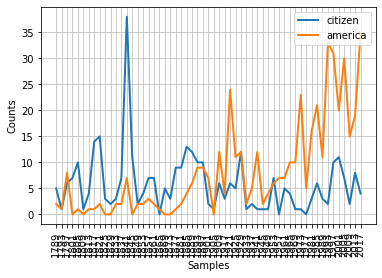

In [76]:
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
             for fileid in inaugural.fileids()
             for w in inaugural.words(fileid)
             for target in ['america', 'citizen']
             if w.lower().startswith(target))

cfd.plot();

#### 1.6 Annotated Text Corpora

*__No notes.__*

#### 1.7 Corpora in Other Languages



*Corpora need to be downloaded from the GUI:*

```
nltk.download()
```

In [81]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [82]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [84]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [86]:
nltk.corpus.jeita.words()

['\u3000', '新潟', 'の', '停車場', 'を', '出る', 'と', '列車', 'の', ...]

In [89]:
print(nltk.corpus.udhr.fileids()[:40], end = '')

['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1', 'Amarakaeri-Latin1', 'Amuesha-Yanesha-UTF8', 'Arabela-Latin1', 'Arabic_Alarabia-Arabic', 'Asante-UTF8', 'Ashaninca-Latin1', 'Asheninca-Latin1', 'Asturian_Bable-Latin1', 'Aymara-Latin1', 'Balinese-Latin1', 'Bambara-UTF8', 'Baoule-UTF8', 'Basque_Euskara-Latin1', 'Batonu_Bariba-UTF8', 'Belorus_Belaruski-Cyrillic', 'Belorus_Belaruski-UTF8', 'Bemba-Latin1', 'Bengali-UTF8', 'Beti-UTF8', 'Bichelamar-Latin1', 'Bikol_Bicolano-Latin1', 'Bora-Latin1', 'Bosnian_Bosanski-Cyrillic', 'Bosnian_Bosanski-Latin2', 'Bosnian_Bosanski-UTF8', 'Breton-Latin1', 'Bugisnese-Latin1', 'Bulgarian_Balgarski-Cyrillic']

In [90]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

*Plot showing word length by language, based upon words in the Universal Declaration of Human Rights:*

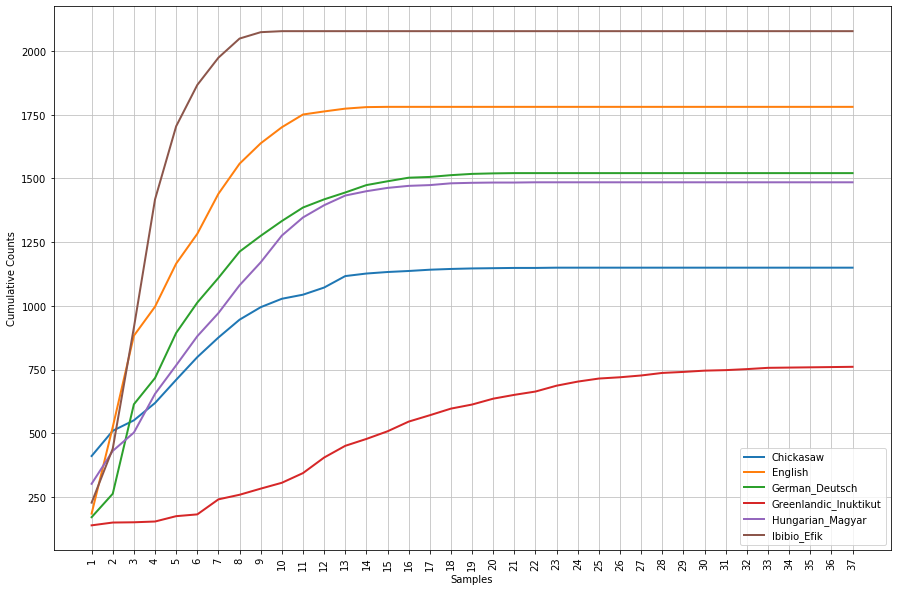

In [95]:
import matplotlib.pyplot as plt

from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))

# to change the size of the plot
plt.figure(figsize=(15, 10))

cfd.plot(cumulative = True);

*The current version of `ConditionalFreqDist.plot` doesn't display cumulative percentage (as was the case for the example in the book), but rather cumulative counts, which leaves us with a quite different looking plot.  To get a plot comparable to the one in the book, I used the code from this [Stackoverflow Discussion](https://stackoverflow.com/questions/55455291/displaying-y-axis-in-percentage-format-when-plotting-conditional-frequency-disti "Percentage Format with cfd").*

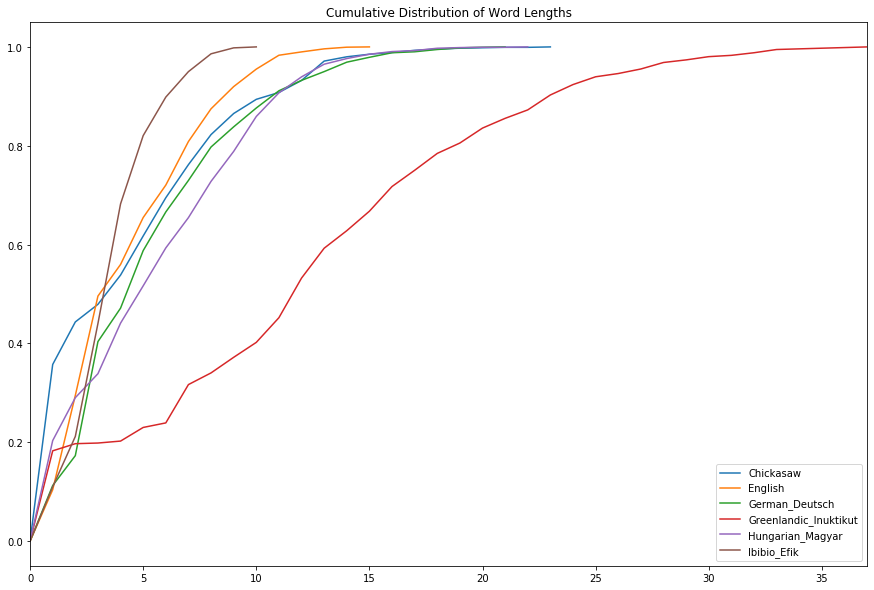

In [98]:
import pandas as pd
from nltk.corpus import udhr
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

languages = ['Chickasaw', 'English', 'German_Deutsch', 
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))

def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words(lang + '-Latin1')])
    eng_freq_dist = {}
    
    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)
        
    ed = pd.Series(eng_freq_dist, name = lang)
    
    ed.cumsum().plot(legend = True, 
                     title = 'Cumulative Distribution of Word Lengths')
    
for lang in languages:
    plot_freq(lang)

In [116]:
for lang in nltk.corpus.udhr.fileids():
    if 'Hawai' in lang:
        print(lang)

Hawaiian-UTF8


*__Your Turn__: Pick a language of interest in `udhr.fileids()`, and define a variable `raw_text = udhr.raw(Language-Latin1)`. Now plot a frequency distribution of the letters of the text using `nltk.FreqDist(raw_text).plot()`.*

*I chose Hawaiian.  It appears that matplotlib can't plot macrons, with the exception of ā.*

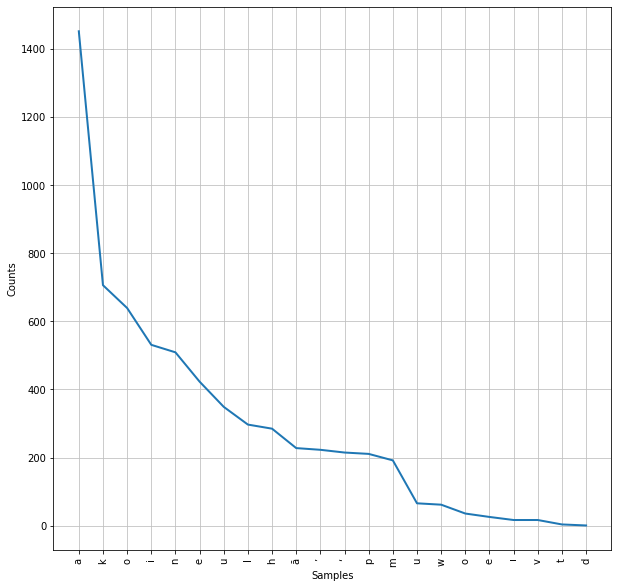

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))


raw_text = [w.lower() for w in udhr.raw('Hawaiian-UTF8') if w.isalpha() or w in ("‘", '’')]
freq_dist = nltk.FreqDist(raw_text)
freq_dist.plot();



#### 1.8 Text Corpus Structure

*__No Notes.__*

#### 1.9 Loading your own Corpus

*I don't yet have any corpora, so I just uploaded a copy of "ALice through the Looking Glass" by Lewis Carroll.  However, most corpus methods are not applicable on this file. I.e., `words` will work, but `categories`, `sents`, etc... will not...*


In [143]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\ThinkPython"
wordlists = PlaintextCorpusReader(corpus_root, "alice.txt")
wordlists.words()

['THROUGH', 'THE', 'LOOKING', '-', 'GLASS', 'By', ...]

### 2 Conditional Frequency Distributions

#### 2.1 Conditions and Events

*__No notes.__*

#### 2.2 Counting Words by Genre

*`ConditionalFreqDist()` needs a list of pairs:*

In [145]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories = genre))

In [157]:
cfd['adventure'].most_common(10)

[('.', 4057),
 (',', 3488),
 ('the', 3370),
 ('and', 1622),
 ('a', 1354),
 ('of', 1322),
 ('to', 1309),
 ('``', 998),
 ("''", 995),
 ('was', 914)]

*A simplified example: looking at just two genres, news and romance.*

In [146]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories = genre)]
len(genre_word)

170576

*The beginning of the FreqDist will be files from `news`, the end files from `romance`:*

In [153]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [155]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

*Making new CFD:*



In [158]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd

<ConditionalFreqDist with 2 conditions>

In [159]:
cfd.conditions()

['news', 'romance']

In [160]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [161]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [162]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [163]:
cfd['romance']['could']

193

*As always, it may be illustrative to get rid of non-alphabetic characters.  In the Brown Corpus, it appears that contractions are not broken up, so we need to include the condition that `"'"` can be in the words.  However, this will count double quotes `''`, so we'll need to add `w != "''"` to the conditional:*

In [197]:
genre_word = [(genre, w.lower())
              for genre in ['news', 'romance']
              for w in brown.words(categories = genre) if w.isalpha() or "'" in w and w != "''"]
len(genre_word)

142835

In [198]:
cfd = nltk.ConditionalFreqDist(genre_word)
cfd['romance'].most_common(20)

[('the', 2988),
 ('and', 1905),
 ('to', 1517),
 ('a', 1383),
 ('of', 1202),
 ('he', 1068),
 ('was', 999),
 ('i', 951),
 ('in', 930),
 ('she', 728),
 ('it', 717),
 ('had', 695),
 ('her', 680),
 ('that', 612),
 ('his', 603),
 ('you', 558),
 ('with', 473),
 ('for', 441),
 ('at', 431),
 ('but', 387)]

In [200]:
cfd['news']["couldn't"]

4

#### 2.3 Plotting and Tabulating Distributions

*Cumulative tabulation of word length in German and English:*

In [201]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
            (lang, len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1'))

cfd.tabulate(conditions = ['English', 'German_Deutsch'],
             samples = range(10), cumulative = True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


*__Your Turn:__ Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called `days` containing a list of days of the week, i.e. `['Monday', ...]`. Now tabulate the counts for these words using `cfd.tabulate(samples=days)`. Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: `samples=['Monday', ...]`.

In [212]:
cfd = nltk.ConditionalFreqDist(
    (genre, word) for genre in ['news', 'romance'] 
    for word in brown.words(categories = genre))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cfd.tabulate(samples = days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


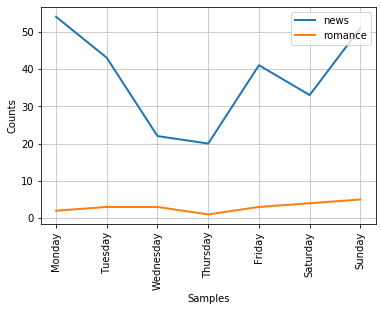

In [214]:
cfd.plot(samples = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

#### 2.4 Generating Random Text with Bigrams



In [218]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['Call', 'me', 'Ishmael', '.']

In [221]:
list(nltk.bigrams(sent3))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

*Generating gibberish text (__n.b.__ - the book calls it "random text", but the text is not at all random: it's deterministic, as my code will generate the exact same text as the author's):*

In [222]:
def generate_model(cfdist, word, num = 15):
    for i in range(num):
        print(word, end = ' ')
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

cfd['living']

FreqDist({'creature': 7, 'thing': 4, 'substance': 2, 'soul': 1, '.': 1, ',': 1})

In [223]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

In [237]:
import random

#random.choice(cfd['living'].keys())
x = list(cfd['living'].keys())
random.choice(x)

'thing'

*This generates truly random text.  Notice that cfd is technically a dictionary, and to get a random value from dictionary keys in Python 3 we need to encase the keys in a `list`:*

In [239]:
import random

def generate_random_model(cfdist, word, num = 15):
    for i in range(num):
        print(word, end = ' ')
        word = random.choice(list(cfdist[word].keys()))
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

generate_random_model(cfd, 'living')

living , walk , Bring them rulers over before thee and twentieth day were bou 

In [240]:
generate_random_model(cfd, 'living')

living soul , Abram removed the vine ; Cush begat Almodad , follow after this 

In [241]:
generate_random_model(cfd, 'living')

living creature , Look now the cool of this la must needs be no hand 

*Ideally, more frequent bigrams would occur more frequently with this function, but I don't believe a cfd is the most efficient way to do that.*

### More Python: Reusing Code

#### 3.1 Creating Programs with a Text Editor

*__No notes.__*

#### 3.2 Functions

*The function `plural()`:*

In [242]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'
    

In [243]:
plural('fairy')

'fairies'

In [244]:
plural('woman')

'women'

*Very easy to break this function:*

In [245]:
plural('pan')

'pen'

#### 3.3 Modules

*__No notes.__*


### 4 Lexical Resources

#### 4.1 Wordlist Corpora

*Finding unusual words:*

In [246]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    return sorted(text_vocab - english_vocab)

In [249]:
print(unusual_words(gutenberg.words('austen-sense.txt'))[:100], end = '')

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions', 'adapted', 'adding', 'additions', 'addressed', 'addresses', 'addressing', 'adhering', 'adieus', 'adjusting', 'administering', 'admirers', 'admires', 'admitting', 'adorned', 'advances', 'advantages', 'affairs', 'affections', 'affects', 'affixed', 'afflictions', 'afforded', 'affording', 'ages', 'agitated', 'agonies', 'ailments', 'aimed', 'alarms', 'alienated', 'alighted', 'alleged', 'allenham', 'allowances', 'allowed', 'allowing', 'alluded', 'alterations', 'altered', 'altering', 'amended', 'amounted', 'amusements', 'ankles', 'annamaria', 'annexed', 'announced', 'announcing', 'annuities', 'annum', 'answered', 'answering', 'answers', 'anticipated', 'anticipating', 'antici

In [250]:
print(unusual_words(nltk.corpus.nps_chat.words())[:100], end = '')

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

*Stopwords:*

In [252]:
print(nltk.corpus.stopwords.words('english'), end = '')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

*A function to compute what fraction of words are not in the stopwords list:*

In [253]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [254]:
content_fraction(reuters.words())

0.735240435097661

*As always, I think it's best to filter out punctuation and white space.  If we do that, we find that fraction of words not in the stopwords list is substantially lower:*

In [255]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.isalpha() and w.lower() not in stopwords]
    return len(content) / len(text)

In [256]:
content_fraction(reuters.words())

0.5064300619268627

*The following code will solve the "Target" puzzle:*

In [259]:
def solve_target_puzzle(puzzle_letters, n = 6):
    """
    Solve the 'Target' puzzle.  Obligatory letter
    must be in the middle of the word. 
    
    Arguments:
    
    puzzle_letters: letters to be used.
    n:              minimum length of solved words
    """
    obligatory = puzzle_letters[4]
    puzzle_letters = nltk.FreqDist(puzzle_letters)
    wordlist = nltk.corpus.words.words()
    return [w for w in wordlist if len(w) >= n
              and obligatory in w
              and nltk.FreqDist(w) <= puzzle_letters]

In [260]:
solve_target_puzzle('egivrvonl')

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

In [262]:
print(solve_target_puzzle('egivrvonl', n = 3), end = '')

['enrol', 'erg', 'ergon', 'genro', 'ger', 'girl', 'girn', 'giro', 'giver', 'glor', 'glore', 'glover', 'goer', 'goner', 'gor', 'gore', 'gorlin', 'govern', 'grein', 'grin', 'groin', 'grove', 'grovel', 'ignore', 'inro', 'involver', 'ire', 'iron', 'irone', 'levir', 'lienor', 'lier', 'liner', 'linger', 'lire', 'liver', 'livor', 'livre', 'loir', 'longer', 'lore', 'lori', 'lorn', 'lover', 'lovering', 'negro', 'nigre', 'noiler', 'noir', 'nor', 'nori', 'norie', 'oer', 'ogler', 'ogre', 'oiler', 'oner', 'ore', 'oriel', 'orle', 'over', 'overling', 'reg', 'regin', 'region', 'reign', 'rein', 'rel', 'renvoi', 'reoil', 'rev', 'revolving', 'rie', 'rig', 'rigol', 'rile', 'rine', 'ring', 'ringe', 'ringle', 'rio', 'rive', 'rivel', 'riven', 'roe', 'rog', 'roi', 'roil', 'role', 'rone', 'rove', 'roving', 'vergi', 'veri', 'vier', 'vigor', 'viner', 'violer', 'vire', 'vireo', 'virl', 'virole', 'viron', 'viver', 'girl', 'iron', 'over', 'ring']

*Names corpus:*

In [263]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [265]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')


*Names that could be either gender:*

In [266]:
print([w for w in male_names if w in female_names], end = '')

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

*Plot showing the distributions of the final letter in men's and women's names:*

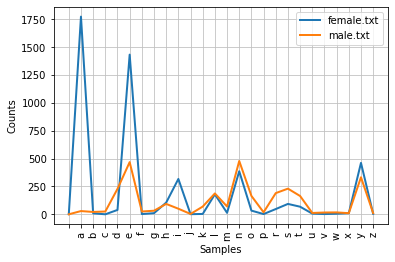

In [267]:
cfd = nltk.ConditionalFreqDist(
            (fileid, name[-1])
            for fileid in names.fileids()
            for name in names.words(fileid))
cfd.plot();

#### 4.2 A Pronouncing Dictionary

*The CMU Pronouncing Dictionary:*

In [2]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [4]:
for e in entries[42371:42379]:
    print(e)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


*Looking for words that beginning with a /p/ sound and end with a /t/ sound:*

In [7]:
for w, p in entries:
    if len(p) == 3:
        ph1, ph2, ph3 = p
        if ph1 == 'P' and ph3 == 'T':
            print(w, ph2, end = ' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

*Another example, this time finding words that end with /&#618;ks/.*

*__Unicode decimal codes for IPA symbols can be found [here](http://www.internationalphoneticalphabet.org/ipa-charts/ipa-symbols-with-unicode-decimal-and-hex-codes/ "IPA symbols").__*

In [11]:
syllable = ['N', 'IH0', 'K', 'S']
print([w for w, p in entries if p[-4:] == syllable], end = ' ')

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

*These words have a silent final 'n':*

In [12]:
print([w for w, p in entries if p[-1] == 'M' and w[-1] == 'n'], end = ' ')

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn'] 

*These digraphs are from words that start with an /n/ sound but are spelled with a silent beginning letter:*

In [14]:
print(sorted(set(w[:2] for w, p in entries if p[0] == 'N' and w[0] != 'n')), end = ' ')

['gn', 'kn', 'mn', 'pn'] 

*This function extracts the stress pattern from the pronunciation.  E.g., the pronunciation for 'abbreviated' is `['AH0', 'B', 'R', 'IY1', 'V', 'IY0', 'EY2', 'T', 'AH0', 'D']`, and the stress pattern would be `['0', '1', '0', '2', '0']`:*

In [19]:
def stress(pron):
    return [char for ph in pron for char in ph if char.isdigit()]

In [24]:
# the returned list is quite long, so only looking at the first 3000 entries

print([w for w, p in entries[:3000] if stress(p) == ['0', '1', '0', '2', '0']], end = ' ')

['abbreviated', 'abbreviated', 'abbreviating', 'accelerated', 'accelerating', 'accelerator', 'accelerators', 'accentuated', 'accentuating', 'accommodated', 'accommodating', 'accommodative', 'accumulated', 'accumulating', 'accumulative', 'accumulator', 'accumulators', 'accusatory', 'adenovirus', 'adjudicated', 'adjudicating', 'administrating', 'administrative', 'administrator', "administrators'", "administrator's", 'administrators', 'adulterated', 'adventurism', 'adventurism', 'affiliated', 'affiliated', "affiliated's", 'affiliating', 'alleviated', 'alleviated', 'alleviating', 'alliteration', 'alliterative'] 

In [25]:
# the returned list is quite long, so only looking at the first 3000 entries

print([w for w, p in entries[:3000] if stress(p) == ['0', '2', '0', '1', '0']], end = ' ')

['abbreviation', 'abbreviations', 'abomination', 'abortifacient', 'abortifacients', 'academicians', 'accommodation', 'accommodations', 'accreditation', 'accreditations', 'accumulation', 'accumulations', 'acetylcholine', 'acetylcholine', 'adjudication', 'administration', "administration's", 'administrations', "administrations'", 'aduliadae', 'adulteration', 'affiliation', 'affiliations', 'aficionados', 'agglomeration', 'ahasuerus', 'ajinomoto', 'alleviation'] 

*This - rather complex - code finds minimal-constrasting sets for words beginning with a /p/ sound and that are composed of three sounds.  The code uses `FreqDist` to group the words together based on their final sounds, and then prints out the first 70 characters of those groups which have more than 10 members:*

In [26]:
p3 = [(p[0] + '-' + p[2], w)
      for (w, p) in entries
      if p[0] == 'P' and len(p) == 3]
cfd = nltk.ConditionalFreqDist(p3)
for t in sorted(cfd.conditions()):
    if len(cfd[t]) > 10:
        words = sorted(cfd[t])
        wordstring = ' '.join(words)
        print(t, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


*Looking up particular words in the dictionary:*

In [27]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

*Some words are missing from the dictionary.  The following code throws and error and will interrupt the notebook, so I'm just copy-and-pasting the error here:*

```
prondict['blog']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-28-4b851fde5ef1> in <module>
----> 1 prondict['blog']

KeyError: 'blog'
```

*We can add new entries to the dictionary:*

In [29]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']]
prondict['blog']

[['B', 'L', 'AA1', 'G']]

*However, the new entries will not be saved.*

*We can use the dictionary within other functions and list comprehensions:*

In [30]:
text = ['natural', 'language', 'processing']
print([ph for w in text for ph in prondict[w][0]], end = '')

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']

*List comprehensions can seem to be a little involved, and the one immediately above is no exception.  It would be much more straightforward as a series of conditionals:*

In [32]:
text = ['natural', 'language', 'processing']
pron = []
for w in text:
    for ph in prondict[w][0]:
        pron.append(ph)
        
print(pron)

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']


#### 4.3 Comparative Wordlists

*__Swadesh wordlists__ are identified using an ISO 639 two-letter code, a list of which can be found [here](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes "ISO 639 codes"):*

In [34]:
from nltk.corpus import swadesh
print(swadesh.fileids(), end = '')

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']

In [38]:
print(swadesh.words('en')[:50], end = '')

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm']

*We can use the `entries()` method to get cognates, and even make a simple dictionary:*

In [41]:
fr2en = swadesh.entries(['fr', 'en'])
print(fr2en[:30], end = ' ')

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few'), ('autre', 'other'), ('un', 'one'), ('deux', 'two'), ('trois', 'three'), ('quatre', 'four'), ('cinq', 'five'), ('grand', 'big'), ('long', 'long'), ('large', 'wide'), ('épais', 'thick')] 

In [43]:
translate = dict(fr2en)
translate['chien']

'dog'

In [44]:
translate['jeter']

'throw'

*Remember that this is only a French-English dictionary - it won't work the other way around:*

```
translate['dog']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-45-1108e6d1d9d4> in <module>
----> 1 translate['dog']

KeyError: 'dog'
```

*And we'd have to make a new dictionary for this purpose:*

In [46]:
en2fr = dict(swadesh.entries(['en', 'fr']))
en2fr['dog']

'chien'

*Updating `translate` with additional language pairs, namely German-English and Spanish-English:*

In [47]:
de2en = swadesh.entries(['de', 'en'])
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

'dog'

In [48]:
translate['perro']

'dog'

*__N.B.:__ It's possible to have a many-to-one dictionary, but not a one-to-many one.  I.e., it's possible to have a dictionary that will translate from a number of lanuages into English, but not one that will translate from English into a number of languages.*

*We can also compare words in various Germanic and Romance languages:*

In [54]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in range(139, 143):
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


*Here's a little function I just made that will use Swadesh wordlists to translate a given English word into numerous languages.  Because I don't want to remember the ordering of the languages in `swadesh.fileids()`, I'd also like to print what language the word is from.  Instead of typing everything out, I found a list of the ISO 639 codes online, which I imported into a csv document.  From there, I'll match the codes in `.fileids()` to the codes in the list, and will pull out the corresponding language names.  Some of the languages are listed under multiple names, so for the sake of simplicity I'll just use the first name (easiest to automate).  There are also some issues with unicode characters that need to be dealt with:*

In [247]:
import os
path = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk"
os.chdir(path)

In [152]:
import csv

with open('iso639.csv', 'r') as f:
    reader = csv.reader(f)
    iso_list = list(reader)


In [171]:
swadesh_names = []
for lang in iso_list:
    if lang[1] in swadesh.fileids():
        swadesh_names.append(lang[0])
        
print(swadesh_names, end = '')

['Belarusian', 'Bulgarian', 'Bosnian', 'Catalan, Valencian', 'Czech', 'Church\xa0Slavic, Old Slavonic, Church Slavonic, Old Bulgarian,\xa0Old\xa0Church\xa0Slavonic', 'German', 'English', 'Spanish, Castilian', 'French', 'Croatian', 'Italian', 'Latin', 'Macedonian', 'Dutch, Flemish', 'Polish', 'Portuguese', 'Romanian, Moldavian, Moldovan', 'Russian', 'Slovak', 'Slovenian', 'Serbian', 'Swahili', 'Ukrainian']

*Removing unicode characters:*

In [172]:
import string

swadesh_names = [name.replace('\xa0', ' ') for name in swadesh_names]
print(swadesh_names, end = '')

['Belarusian', 'Bulgarian', 'Bosnian', 'Catalan, Valencian', 'Czech', 'Church Slavic, Old Slavonic, Church Slavonic, Old Bulgarian, Old Church Slavonic', 'German', 'English', 'Spanish, Castilian', 'French', 'Croatian', 'Italian', 'Latin', 'Macedonian', 'Dutch, Flemish', 'Polish', 'Portuguese', 'Romanian, Moldavian, Moldovan', 'Russian', 'Slovak', 'Slovenian', 'Serbian', 'Swahili', 'Ukrainian']

*Using just the first name given for each language:*

In [173]:
for i in range(len(swadesh_names)):
    if "," in swadesh_names[i]:
        comma = swadesh_names[i].index(",")
        swadesh_names[i] = swadesh_names[i][:comma]

print(swadesh_names, end = '')

['Belarusian', 'Bulgarian', 'Bosnian', 'Catalan', 'Czech', 'Church Slavic', 'German', 'English', 'Spanish', 'French', 'Croatian', 'Italian', 'Latin', 'Macedonian', 'Dutch', 'Polish', 'Portuguese', 'Romanian', 'Russian', 'Slovak', 'Slovenian', 'Serbian', 'Swahili', 'Ukrainian']

*There's a discrepancy between the codes in `.fileids()` and the list.  "sw" is listed as "Swahili" in the lists I've consulted, but here it obviously refers to "Swedish".  I'm not sure what caused the discrepancy, but it's easy enough to fix manually:*

In [179]:
swadesh_names[-2] = "Swedish"
print(swadesh_names, end = '')

['Belarusian', 'Bulgarian', 'Bosnian', 'Catalan', 'Czech', 'Church Slavic', 'German', 'English', 'Spanish', 'French', 'Croatian', 'Italian', 'Latin', 'Macedonian', 'Dutch', 'Polish', 'Portuguese', 'Romanian', 'Russian', 'Slovak', 'Slovenian', 'Serbian', 'Swedish', 'Ukrainian']

*Easier to look up names in a `dict`, so we'll make one:*

In [180]:
swadesh_names_dict = dict((code, lang) for code, 
                           lang in zip(swadesh.fileids(), 
                                       swadesh_names))

In [181]:
print(swadesh_names_dict, end = '')

{'be': 'Belarusian', 'bg': 'Bulgarian', 'bs': 'Bosnian', 'ca': 'Catalan', 'cs': 'Czech', 'cu': 'Church Slavic', 'de': 'German', 'en': 'English', 'es': 'Spanish', 'fr': 'French', 'hr': 'Croatian', 'it': 'Italian', 'la': 'Latin', 'mk': 'Macedonian', 'nl': 'Dutch', 'pl': 'Polish', 'pt': 'Portuguese', 'ro': 'Romanian', 'ru': 'Russian', 'sk': 'Slovak', 'sl': 'Slovenian', 'sr': 'Serbian', 'sw': 'Swedish', 'uk': 'Ukrainian'}

In [198]:
from nltk.corpus import swadesh

def print_swadesh_words(word):
    if word in swadesh.words('en'):
        i = swadesh.words('en').index(word)
        for l in swadesh.fileids():
            word = swadesh.entries([l])[i][0]
            print("{}: {} {}".format(swadesh_names_dict[l], 
                        " " * (13 - len(swadesh_names_dict[l])), word))
                               # using len to add padding to algin the results
    else:
        print("Sorry, '{}' is not among the words in the list.".format(word))


In [199]:
print_swadesh_words("friend")

Sorry, 'friend' is not among the words in the list.


#### 4.4 Shoebox and Toolbox Lexicons



In [203]:
from nltk.corpus import toolbox
print(toolbox.entries('rotokas.dic')[:2], end = '')

[('kaa', [('ps', 'V'), ('pt', 'A'), ('ge', 'gag'), ('tkp', 'nek i pas'), ('dcsv', 'true'), ('vx', '1'), ('sc', '???'), ('dt', '29/Oct/2005'), ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'), ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'), ('xe', 'Apoka is gagging from food while talking.')]), ('kaa', [('ps', 'V'), ('pt', 'B'), ('ge', 'strangle'), ('tkp', 'pasim nek'), ('arg', 'O'), ('vx', '2'), ('dt', '07/Oct/2006'), ('ex', 'Rera rauroro rera kaarevoi.'), ('xp', 'Em i holim pas em na nekim em.'), ('xe', 'He is holding him and strangling him.'), ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'), ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'), ('xe', "They strangled the man's neck with rope because he was very stubborn and arrogant."), ('ex', 'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'), ('xp', 'Ol i pasim nek bilong man long rop. Olsem na em i no pulim win olsem na em 

### 5 Word Net

#### 5.1 Senses and Synonyms

*Finding synonyms with Word Net:*

In [220]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [221]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

*Here's an easier way to get lemma names:*

In [226]:
[s.lemma_names() for s in wn.synsets('motorcar')]


[['car', 'auto', 'automobile', 'machine', 'motorcar']]

*Definitions and examples of words:*

In [227]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [228]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

*As above:*

In [232]:
[s.definition() for s in wn.synsets('dog')]

['a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds',
 'a dull unattractive unpleasant girl or woman',
 'informal term for a man',
 'someone who is morally reprehensible',
 'a smooth-textured sausage of minced beef or pork usually smoked; often served on a bread roll',
 'a hinged catch that fits into a notch of a ratchet to move a wheel forward or prevent it from moving backward',
 'metal supports for logs in a fireplace',
 'go after with the intent to catch']

*Note that there's usually only one example per synset:*

In [233]:
[s.examples() for s in wn.synsets('dog')]

[['the dog barked all night'],
 ['she got a reputation as a frump', "she's a real dog"],
 ['you lucky dog'],
 ['you dirty dog'],
 [],
 [],
 ['the andirons were too hot to touch'],
 ['The policeman chased the mugger down the alley',
  'the dog chased the rabbit']]

*Different methods with synsets:*

In [234]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [235]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [236]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [237]:
wn.lemma('car.n.01.automobile').name()

'automobile'

*Synonyms for the different synsets of 'car':*

In [238]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


*Getting all the lemmas:*

In [239]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

*__Your Turn:__ Write down all the senses of the word dish that you can think of. Now, explore this word with the help of WordNet, using the same operations we used above.*

+ 1) a surface from which to eat off of.

+ 2) a food that is made

+ 3) equipment used to receive radio waves

+ 4) to gossip

+ 5) an attractive person

In [240]:
[s.definition() for s in wn.synsets('dish')]

['a piece of dishware normally used as a container for holding or serving food',
 'a particular item of prepared food',
 'the quantity that a dish will hold',
 'a very attractive or seductive looking woman',
 'directional antenna consisting of a parabolic reflector for microwave or radio frequency radiation',
 'an activity that you like or at which you are superior',
 'provide (usually but not necessarily food)',
 'make concave; shape like a dish']

In [242]:
for synset in wn.synsets('dish'):
    print(synset.lemma_names())

['dish']
['dish']
['dish', 'dishful']
['smasher', 'stunner', 'knockout', 'beauty', 'ravisher', 'sweetheart', 'peach', 'lulu', 'looker', 'mantrap', 'dish']
['dish', 'dish_aerial', 'dish_antenna', 'saucer']
['cup_of_tea', 'bag', 'dish']
['serve', 'serve_up', 'dish_out', 'dish_up', 'dish']
['dish']


In [241]:
[s.examples() for s in wn.synsets('dish')]

[['we gave them a set of dishes for a wedding present'],
 ['she prepared a special dish for dinner'],
 ['they served me a dish of rice'],
 [],
 [],
 ['chemistry is not my cup of tea',
  'his bag now is learning to play golf',
  'marriage was scarcely his dish'],
 ['We serve meals for the homeless',
  'She dished out the soup at 8 P.M.',
  'The entertainers served up a lively show'],
 []]

#### 5.2 The WordNet Hierarchy



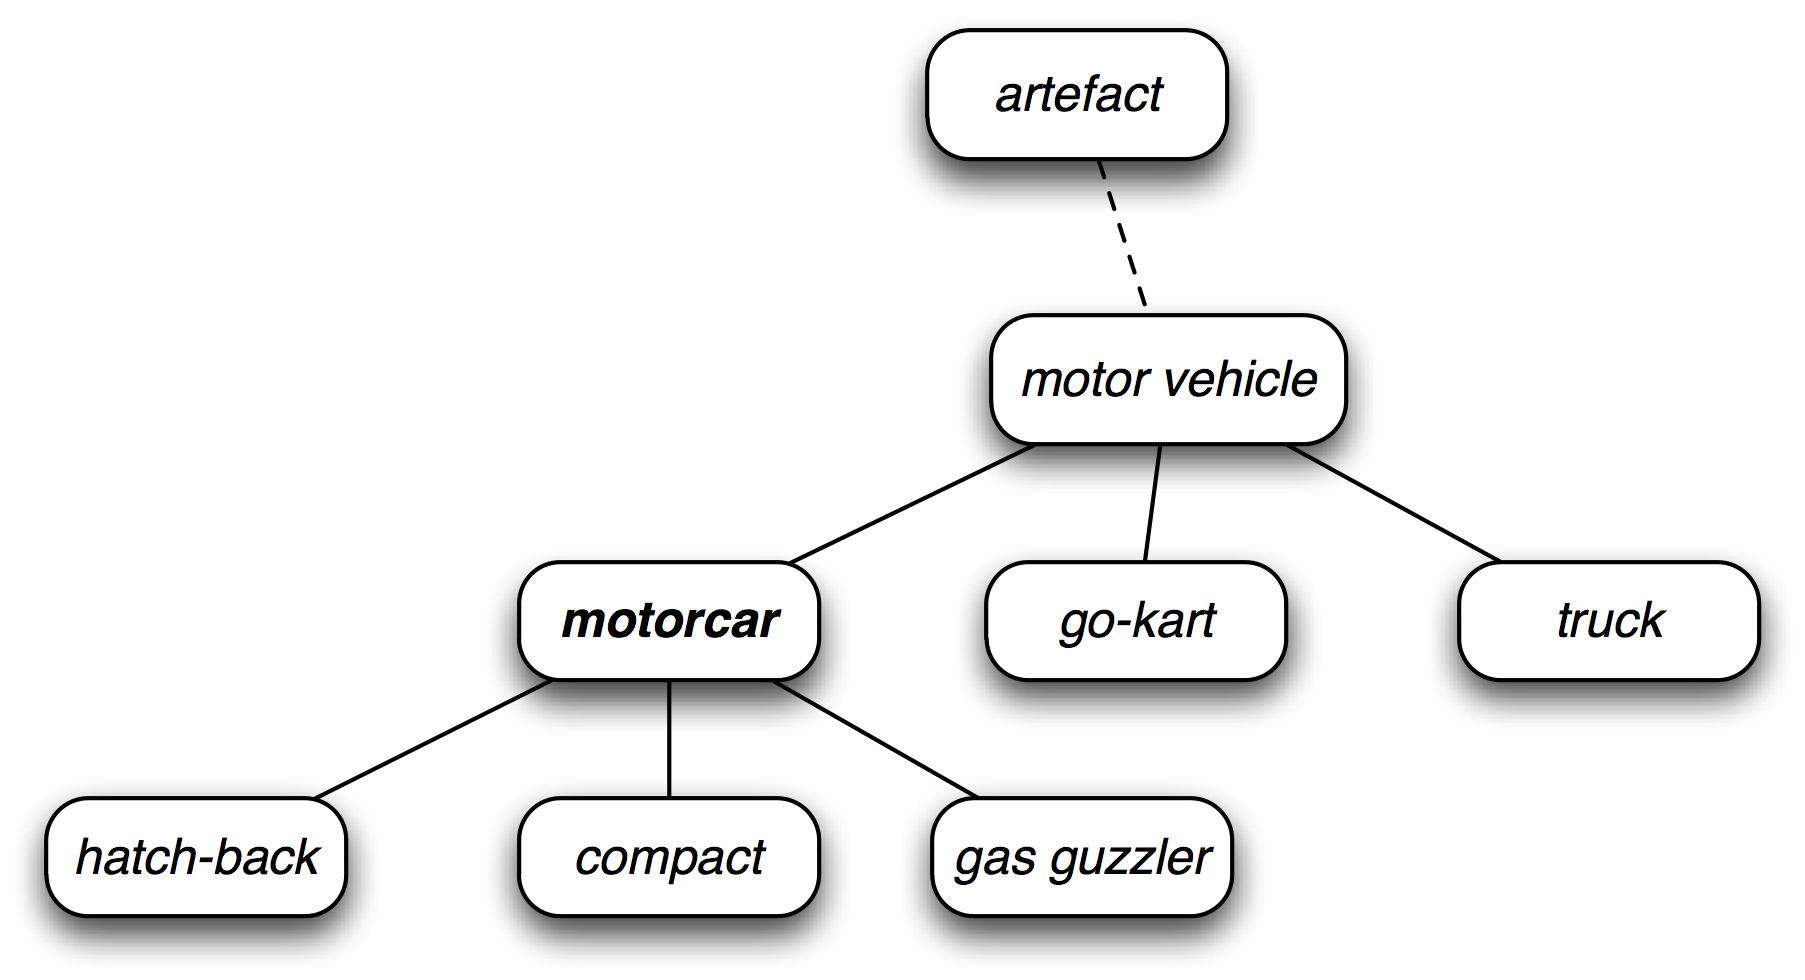

In [250]:
from IPython.display import display, Image

display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\wordnet-hierarchy.png"))

*__Hyponyms__ are more specific:*

In [251]:
wn.synset('car.n.01').hyponyms()

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

*Example from the book:*

In [261]:
print(sorted(lemma.name() for synset in wn.synset('car.n.01').hyponyms() for lemma in synset.lemmas()), end = '')

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car', 'taxi', 'taxicab', 'tourer', 'touring_car', 'two-seater', 'used-car', 'waggon', 'wagon']

*The hierarchy for WordNet isn't immediately obvious, and seeing this in a list comprehension just makes it more complex.  It's a bit easier to follow in a `for`-loop:*

In [263]:
for synset in wn.synset('car.n.01').hyponyms():
    for lemma in synset.lemmas():
        print(lemma.name(), end = ' ')

ambulance beach_wagon station_wagon wagon estate_car beach_waggon station_waggon waggon bus jalopy heap cab hack taxi taxicab compact compact_car convertible coupe cruiser police_cruiser patrol_car police_car prowl_car squad_car electric electric_automobile electric_car gas_guzzler hardtop hatchback horseless_carriage hot_rod hot-rod jeep landrover limousine limo loaner minicar minivan Model_T pace_car racer race_car racing_car roadster runabout two-seater sedan saloon sport_utility sport_utility_vehicle S.U.V. SUV sports_car sport_car Stanley_Steamer stock_car subcompact subcompact_car touring_car phaeton tourer used-car secondhand_car 

*__Hypernyms__ are more general, and we can go to the top of the hierarchy via hypernym paths.  Some words have mutliple paths, since they can be classified multiple ways.  E.g., 'cars' can be classified as either conveyances or containers:*

In [265]:
paths = wn.synset('car.n.01').hypernym_paths()
len(paths)

2

In [267]:
print([synset.name() for synset in paths[0]], end = '')

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']

In [268]:
print([synset.name() for synset in paths[1]], end = '')

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']

*Here's how to get the most general hypernyms of a synset:*

In [269]:
wn.synset('car.n.01').root_hypernyms()

[Synset('entity.n.01')]

*__Your Turn:__ Try out NLTK's convenient graphical WordNet browser: nltk.app.wordnet(). Explore the WordNet hierarchy by following the hypernym and hyponym links.*

`nltk.app.wordnet()` does not work in jupyter, and has very limited functionality when you run Python from the command line.  It seems like the easiest option would be just to go to the WordNet homepage [here](http://wordnetweb.princeton.edu/perl/webwn "WordNet").

### 5.3 More Lexical Relations

*__Meronyms__ and __Holonyms__:*

In [275]:
print(wn.synset('tree.n.01').part_meronyms(), end = '')

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]

In [276]:
print(wn.synset('tree.n.01').substance_meronyms(), end = '')

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [279]:
print(wn.synset('tree.n.01').member_holonyms(), end = '')

[Synset('forest.n.01')]

*This can quickly get confusing, since one synset of a word can be a meronym and a holonym of the different synsets of itself:*

In [285]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ":", synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [286]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [290]:
wn.synset('mint.n.02').part_meronyms()

[Synset('mint.n.04')]

In [292]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

*When examining verbs we deal with __entailments__:*

In [294]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [295]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [296]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

*All forms of speech have __antonymy__:*

In [298]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [299]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [300]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]

In [301]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

*All the relationships:*

In [303]:
print(dir(wn.synset('harmony.n.02')), end = '')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_all_hypernyms', '_definition', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth', '_name', '_needs_root', '_offset', '_pointers', '_pos', '_related', '_shortest_hypernym_paths', '_wordnet_corpus_reader', 'also_sees', 'attributes', 'causes', 'closure', 'common_hypernyms', 'definition', 'entailments', 'examples', 'frame_ids', 'hypernym_distances', 'hypernym_paths', 'hypernyms', 'hyponyms', 'in_region_domains', 'in_topic_domains', 'in_usage_domains', 'instance_hypernyms', 'instance_hyponyms', 'jcn_similarity', 'lch

#### 5.4 Semantic Similarity

*Finding the lowest point in the WordNet hierarchy that joins two entities:*

In [305]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')


right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [306]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [307]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [308]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

*Finding the depths in the hierarchies for these synsets:* 

In [309]:
wn.synset('baleen_whale.n.01').min_depth()

14

In [310]:
wn.synset('whale.n.02').min_depth()

13

In [311]:
wn.synset('vertebrate.n.01').min_depth()

8

In [312]:
wn.synset('entity.n.01').min_depth()

0

*`path_similarity` will assign a score between 0-1 based on the shortest path that connects two concepts in the hypernym hierarchy.*

In [314]:
right.path_similarity(orca)

0.16666666666666666

In [315]:
right.path_similarity(tortoise)

0.07692307692307693

In [316]:
right.path_similarity(novel)

0.043478260869565216

*I'm finding WordNet somewhat difficult to navigate, especially within Python. One difficulty is that it's never obvious which synset we'd need to use, i.e., which number we'd need to suffix to the word we're looking up.  We can only deduce this by looking at all the lemmas for a given synset, or even a synset's definition.  E.g., with the word 'tree', it's not immediately obvious from the lemmas which synset we'd need.*

In [282]:
for synset in wn.synsets('tree'):
    print(synset.lemma_names())

['tree']
['tree', 'tree_diagram']
['Tree', 'Sir_Herbert_Beerbohm_Tree']
['corner', 'tree']
['tree']
['tree']
['tree', 'shoetree']


*By looking at the definitions it's easier to distinguish the different synsets:*

In [284]:
for synset in wn.synsets('tree'):
    print(synset.definition())

a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms
a figure that branches from a single root
English actor and theatrical producer noted for his lavish productions of Shakespeare (1853-1917)
force a person or an animal into a position from which he cannot escape
plant with trees
chase an animal up a tree
stretch (a shoe) on a shoetree


*Still, this is difficult to navigate in Python, albeit easier to do with the WordNet Search Engine. WordNet looks like it's not nearly as popular as it used to be, and the lack of ease of use may be one reason why.*

### 6 Summary

*__No notes.__*

### 7 Further Reading

*__No notes.__*

